dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}


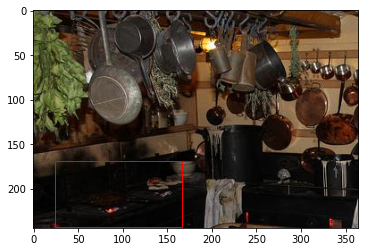

In [2]:
import json
with open('/home/proj01/efficientdet-pytorch/data/split/annotations/instances_val2017.json')as f:
  obj = json.load(f)
print(obj.keys())
for i in obj['images']:
  print(i)
  break

import matplotlib.pyplot as plt
import matplotlib.patches as patches
img = plt.imread('/home/proj01/efficientdet-pytorch/data/split/split_0/val2017/'+i['file_name'])

fig, ax = plt.subplots()

ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((24, 169), 167-24, 242-168, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

# image 분할

In [3]:
import pandas as pd
from PIL import Image
import os
from IPython.display import display

n_tile = 3 # partitioned width or height
path = 'data_air/images'
save_dir = 'data_air/split_3_00/split'
file_list = os.listdir(path)
overlap_percentage = 0
for img_name in file_list:
  img = Image.open(path+'/'+img_name) #img_name
  #display(img)
  width, height = img.size
  #sub_width = int(width/(n_tile-overlap_percentage))
  #sub_height = int(height/(n_tile-overlap_percentage))
  sub_width = int(width/(overlap_percentage*(1-n_tile)+n_tile))
  sub_height = int(height/(overlap_percentage*(1-n_tile)+n_tile))
  ind = 0
  
  for h in range(n_tile):
    for w in range(n_tile):
      #시작점 w*sub_width,h*sub_height
      #끝점 (w+1)*sub_width, (h+1)*sub_height
      area = (w*sub_width,h*sub_height,(w+1)*sub_width, (h+1)*sub_height)
      sub_img = img.crop(area)
      #print(sub_img.size)
      #display(sub_img)
      save_file = save_dir+'_'+str(ind)+'/images/'+img_name
      #폴더확인
      if not os.path.exists(save_dir+'_'+str(ind)+'/images/'):
            os.makedirs(save_dir+'_'+str(ind)+'/images/')
      ind+=1
      sub_img.save(save_file)


# image 분할 no overlap

In [6]:
import pandas as pd
from PIL import Image
import os
from IPython.display import display

n_tile = 2 # partitioned width or height
path = 'data/val2017'
save_dir = 'data/split_n/split'
file_list = os.listdir(path)
for img_name in file_list:
  img = Image.open(path+'/'+img_name) #img_name
  #display(img)
  width, height = img.size
  #sub_width = int(4*width/(3*n_tile+1))
  #sub_height = int(4*height/(3*n_tile+1))
  sub_width = int(width/n_tile)
  sub_height = int(height/n_tile)
  #print('original : ',width,height)
  #print('sub : ',sub_width,sub_height)
  ind = 0
  for h in range(n_tile):
    for w in range(n_tile):
      #print(w*(width-sub_width),h*(height-sub_height)) # 시작점
      #print(sub_width+w*(width-sub_width),sub_height+h*(height-sub_height)) # 끝점
      area = (w*(width-sub_width),h*(height-sub_height),sub_width+w*(width-sub_width),sub_height+h*(height-sub_height))
      sub_img = img.crop(area)
      #print(sub_img.size)
      #display(sub_img)
      save_file = save_dir+'_'+str(ind)+'/val2017/'+img_name
      ind+=1
      sub_img.save(save_file)
  #break
  